# 2.3 Применение дисперсионного анализа

В этом уроке мы научимся применять дисперсионный анализ!

Ссылка на скрипт урока: https://stepic.org/media/attachments/lesson/11505/anova.R

Ссылка на данные урока:

﻿https://stepic.org/media/attachments/lesson/11505/shops.csv﻿

﻿https://stepic.org/media/attachments/lesson/11505/therapy_data.csv﻿

In [1]:
### ANOVA

library(ggplot2)

# formulae

DV ~ IV # One-way

DV ~ IV1 + IV2 # Two-way

DV ~ IV1:IV2  # Two-way interaction

DV ~ IV1 + IV2 + IV1:IV2 # Main effects + interaction

DV ~ IV1 * IV2  # The same: Main effects + interaction

DV ~ IV1 + IV2 + IV3 + IV1:IV2

DV ~ (IV1 + IV2 + IV3)^2 # main effects and all possible interactions up to level 2

DV ~ IV1 + Error(subject/IV1) # repeated measures

DV ~ IV

DV ~ IV1 + IV2

DV ~ IV1:IV2

DV ~ IV1 + IV2 + IV1:IV2

DV ~ IV1 * IV2

DV ~ IV1 + IV2 + IV3 + IV1:IV2

DV ~ (IV1 + IV2 + IV3)^2

DV ~ IV1 + Error(subject/IV1)

In [1]:
# reading data

mydata <- read.csv('https://stepic.org/media/attachments/lesson/11505/shops.csv')


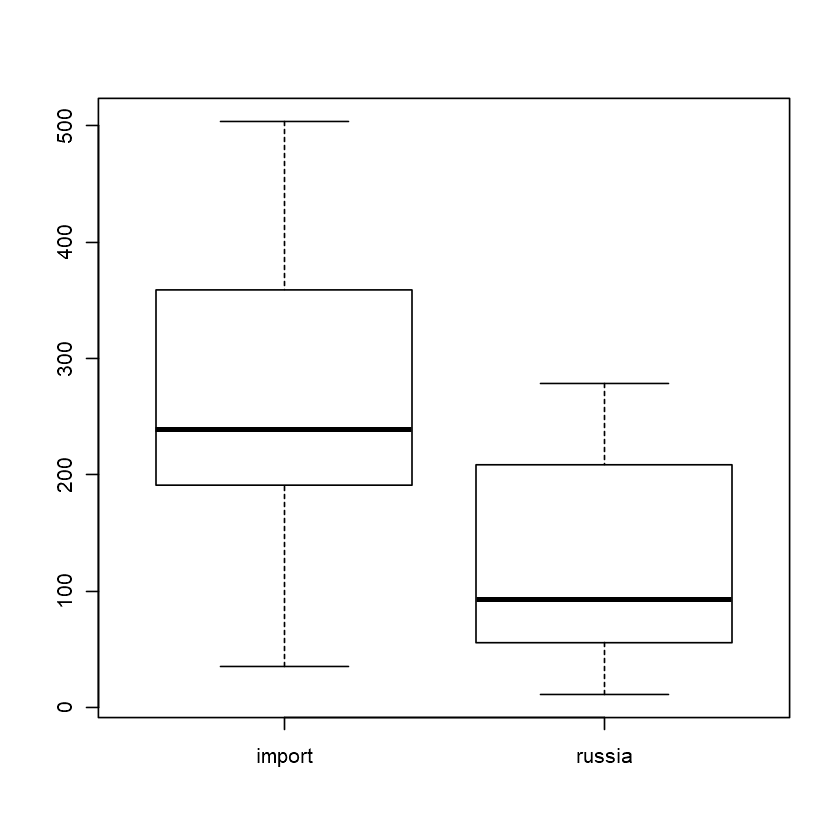

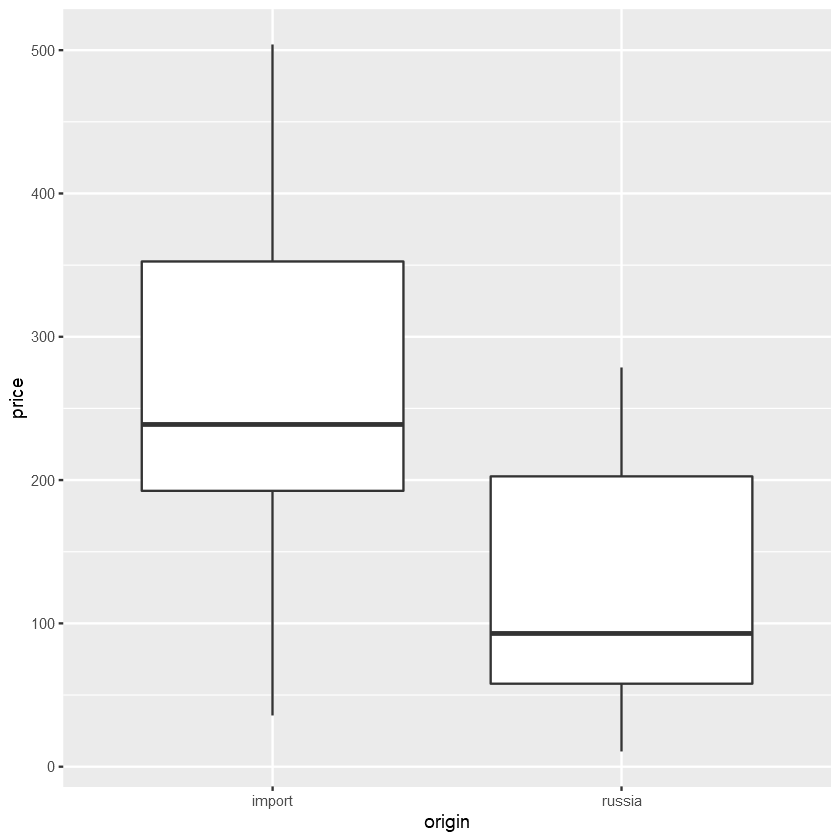

In [153]:
# One-way ANOVA

boxplot(price ~ origin, data=mydata)

ggplot(mydata, aes(x = origin, y = price)) + 
  geom_boxplot()

In [25]:
fit <- aov(price ~ origin, data=mydata)
summary(fit)

            Df Sum Sq Mean Sq F value Pr(>F)  
origin       1  94107   94107    6.65 0.0189 *
Residuals   18 254729   14152                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [26]:
# Two-way ANOVA

fit1 <- aov(price ~ origin + store, data=mydata)
summary(fit1)

model.tables(fit1,"means")

            Df Sum Sq Mean Sq F value Pr(>F)  
origin       1  94107   94107   6.355  0.022 *
store        1   2981    2981   0.201  0.659  
Residuals   17 251749   14809                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Tables of means
Grand mean
         
192.7745 

 origin 
origin
import russia 
261.37 124.18 

 store 
store
 minimarket supermarket 
     204.98      180.57 

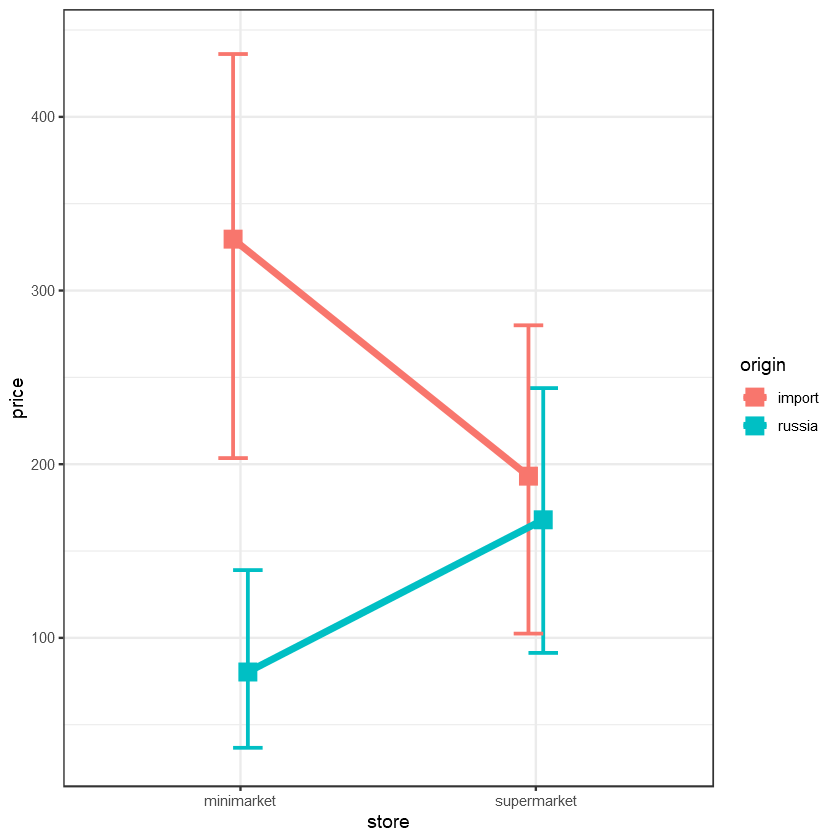

In [6]:
# Interaction

pd = position_dodge(0.1)
ggplot(mydata, aes(x = store, y = price, color = origin, group = origin)) + 
  stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.2, lwd = 0.8, position = pd)+  
  stat_summary(fun.data = mean_cl_boot, geom = 'line', size = 1.5, position = pd) +
  stat_summary(fun.data = mean_cl_boot, geom = 'point', size = 5, position = pd, pch=15) +
  theme_bw()

In [7]:
fit3 <- aov(price ~ origin + store + origin:store, data=mydata)
summary(fit3)

             Df Sum Sq Mean Sq F value Pr(>F)  
origin        1  94107   94107   7.968 0.0123 *
store         1   2981    2981   0.252 0.6222  
origin:store  1  62777   62777   5.315 0.0349 *
Residuals    16 188971   11811                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [8]:
fit4 <- aov(price ~ origin * store, data=mydata)
summary(fit4)

             Df Sum Sq Mean Sq F value Pr(>F)  
origin        1  94107   94107   7.968 0.0123 *
store         1   2981    2981   0.252 0.6222  
origin:store  1  62777   62777   5.315 0.0349 *
Residuals    16 188971   11811                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

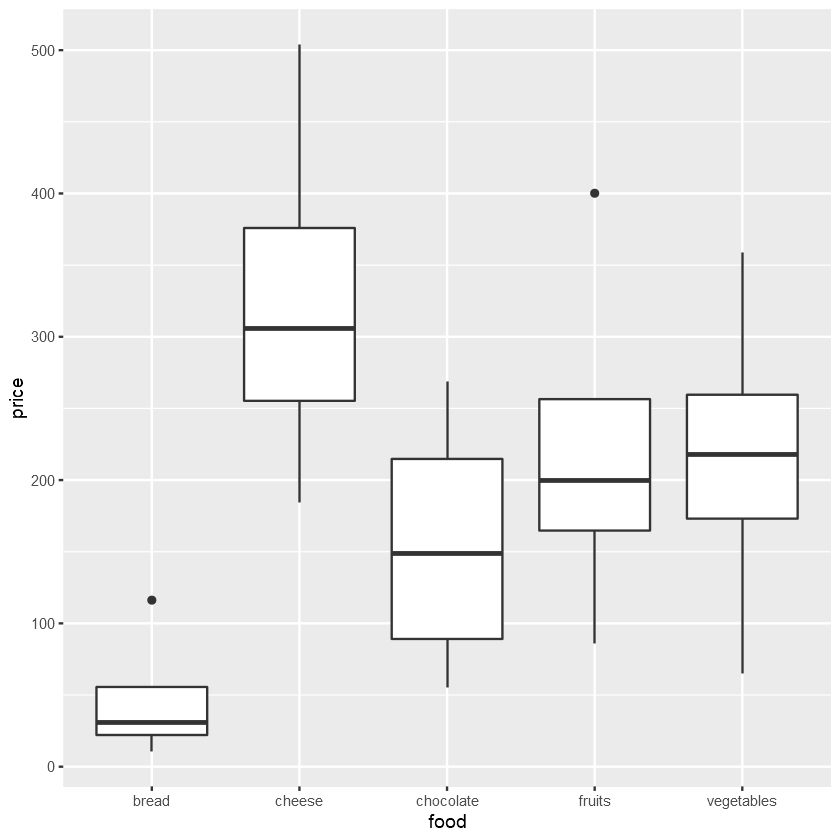

In [9]:
# Pairwise comparisons

ggplot(mydata, aes(x = food, y = price)) + 
  geom_boxplot()


In [10]:
fit5 <- aov(price ~ food, data=mydata)
summary(fit5)


            Df Sum Sq Mean Sq F value Pr(>F)  
food         4 165823   41456   3.398 0.0362 *
Residuals   15 183013   12201                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Воспользуемся встроенными данными npk, иллюстрирующими влияние применения различных удобрений на урожайность гороха (yield). Нашей задачей будет выяснить, существенно ли одновременное применение азота (фактор N) и фосфата (фактор P). Примените дисперсионный анализ, где будет проверяться влияние фактора применения азота (N), влияние фактора применения фосфата (P) и их взаимодействие.
В ответе укажите p-value для взаимодействия факторов N и P.

Десятичный разделитель - запятая!


In [60]:
summary(aov(yield ~ N*P, data = npk))

            Df Sum Sq Mean Sq F value Pr(>F)  
N            1  189.3  189.28   5.758 0.0263 *
P            1    8.4    8.40   0.256 0.6187  
N:P          1   21.3   21.28   0.647 0.4305  
Residuals   20  657.4   32.87                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Теперь проведите трехфакторный дисперсионный анализ, где зависимая переменная - это урожайность (yield), а три фактора - типы удобрений (N, P, K). После проведения данного анализа вы получите три значения p - уровня значимости (о значимости каждого из факторов).

Соотнесите названия факторов и значения p - уровня значимости.

In [64]:
summary(aov(yield ~ (N + P + K), data = npk) )

            Df Sum Sq Mean Sq F value Pr(>F)  
N            1  189.3  189.28   6.488 0.0192 *
P            1    8.4    8.40   0.288 0.5974  
K            1   95.2   95.20   3.263 0.0859 .
Residuals   20  583.5   29.17                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [65]:
TukeyHSD(fit5)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = price ~ food, data = mydata)

$food
                          diff        lwr       upr     p adj
cheese-bread          278.0525   36.86938 519.23562 0.0204058
chocolate-bread       108.2200 -132.96312 349.40312 0.6453667
fruits-bread          174.3125  -66.87062 415.49562 0.2209202
vegetables-bread      167.7625  -73.42062 408.94562 0.2512881
chocolate-cheese     -169.8325 -411.01562  71.35062 0.2413687
fruits-cheese        -103.7400 -344.92312 137.44312 0.6789317
vegetables-cheese    -110.2900 -351.47312 130.89312 0.6297401
fruits-chocolate       66.0925 -175.09062 307.27562 0.9117335
vegetables-chocolate   59.5425 -181.64062 300.72562 0.9375222
vegetables-fruits      -6.5500 -247.73312 234.63312 0.9999874


Проведите однофакторный дисперсионный анализ на встроенных данных iris. Зависимая переменная - ширина чашелистика (Sepal.Width), независимая переменная - вид (Species). Затем проведите попарные сравнения видов. Какие виды статистически значимо различаются по ширине чашелистика (p < 0.05)?

In [68]:
TukeyHSD(aov(Sepal.Width ~ Species,data = iris))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sepal.Width ~ Species, data = iris)

$Species
                       diff         lwr        upr     p adj
versicolor-setosa    -0.658 -0.81885528 -0.4971447 0.0000000
virginica-setosa     -0.454 -0.61485528 -0.2931447 0.0000000
virginica-versicolor  0.204  0.04314472  0.3648553 0.0087802


In [13]:
# Repeated measures

mydata2 <- read.csv('https://stepic.org/media/attachments/lesson/11505/therapy_data.csv')
str(mydata2)


'data.frame':	30 obs. of  5 variables:
 $ subject   : int  1 1 1 2 2 2 3 3 3 4 ...
 $ sex       : Factor w/ 2 levels "female","male": 1 1 1 1 1 1 2 2 2 2 ...
 $ therapy   : Factor w/ 3 levels "placebo","therapy1",..: 2 3 1 2 3 1 2 3 1 2 ...
 $ price     : Factor w/ 2 levels "high","low": 2 2 2 2 2 2 2 2 2 2 ...
 $ well_being: num  54.3 62.6 28.1 35.9 28.1 ...


In [14]:
mydata2$subject <- as.factor(mydata2$subject)


In [15]:
fit1 <- aov(well_being ~ therapy, data = mydata2)
summary(fit1)

            Df Sum Sq Mean Sq F value Pr(>F)
therapy      2    427   213.4   0.668  0.521
Residuals   27   8625   319.4               

In [16]:
fit1b <- aov(well_being ~ therapy + Error(subject/therapy), data = mydata2)
summary(fit1b)


Error: subject
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  4    860     215               

Error: subject:therapy
          Df Sum Sq Mean Sq F value Pr(>F)
therapy    2  426.8   213.4   0.619  0.563
Residuals  8 2760.3   345.0               

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 15   5005   333.6               

In [17]:
fit2 <- aov(well_being ~ therapy*price, data = mydata2)
summary(fit2)

              Df Sum Sq Mean Sq F value Pr(>F)  
therapy        2    427   213.4   0.743 0.4863  
price          1   1675  1674.8   5.831 0.0237 *
therapy:price  2     57    28.6   0.100 0.9057  
Residuals     24   6893   287.2                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

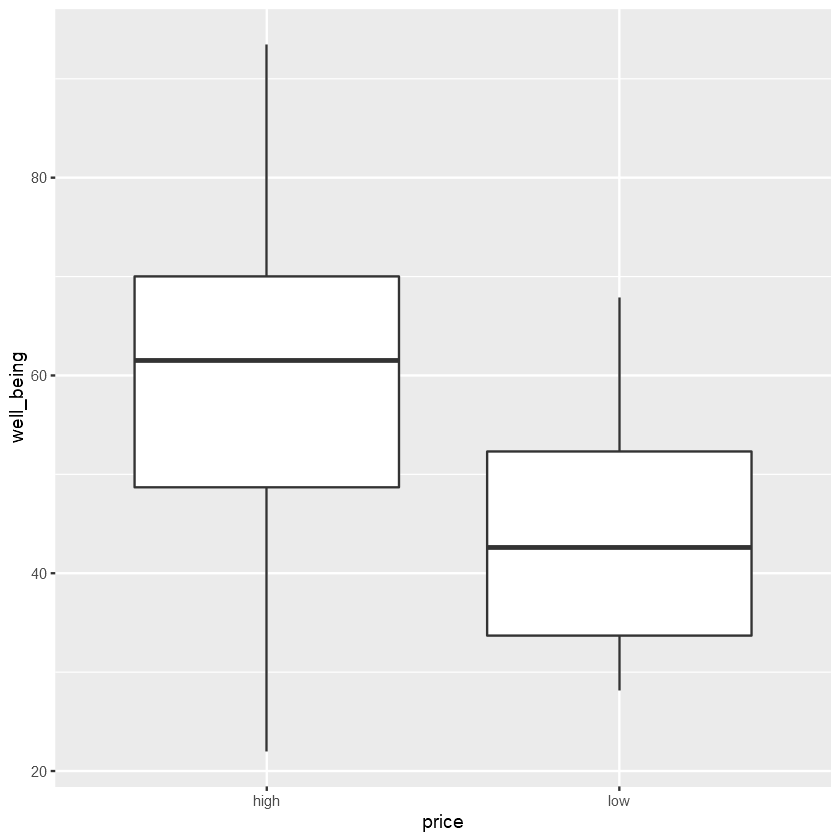

In [18]:
ggplot(mydata2, aes(x = price, y = well_being)) + 
  geom_boxplot()

In [19]:
fit2b <- aov(well_being ~ therapy*price + Error(subject/(therapy*price)), data = mydata2)
summary(fit2b)



Error: subject
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  4    860     215               

Error: subject:therapy
          Df Sum Sq Mean Sq F value Pr(>F)
therapy    2  426.8   213.4   0.619  0.563
Residuals  8 2760.3   345.0               

Error: subject:price
          Df Sum Sq Mean Sq F value Pr(>F)  
price      1   1675  1674.8   6.667 0.0612 .
Residuals  4   1005   251.2                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Error: subject:therapy:price
              Df Sum Sq Mean Sq F value Pr(>F)
therapy:price  2   57.2   28.58   0.101  0.905
Residuals      8 2267.8  283.48               

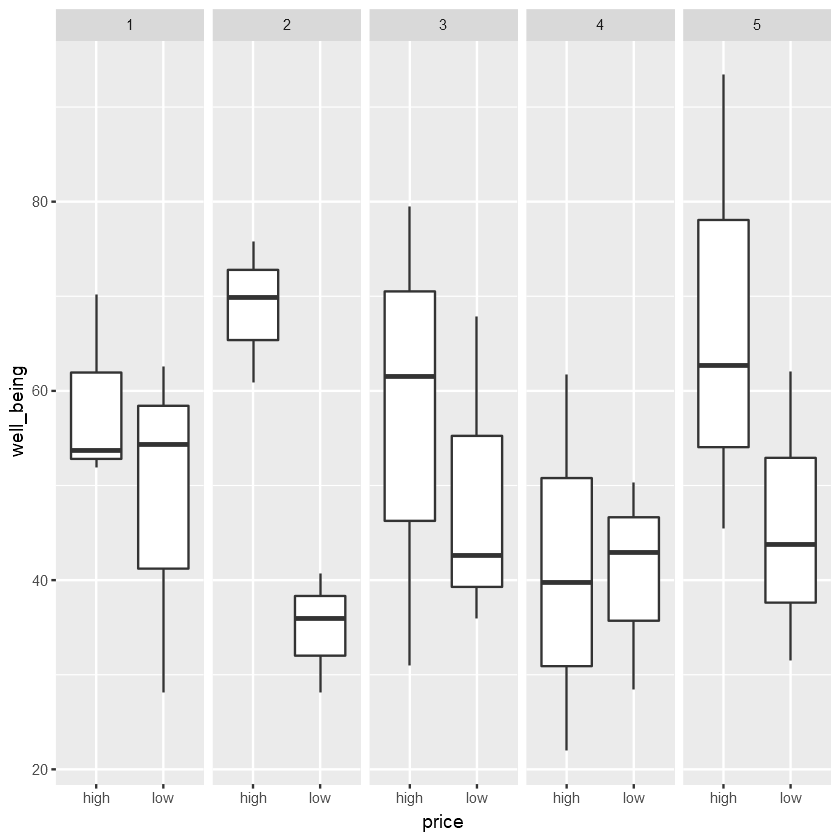

In [20]:
ggplot(mydata2, aes(x = price, y = well_being)) + 
  geom_boxplot() + 
  facet_grid(~subject)

In [21]:
fit3 <- aov(well_being ~ therapy*price*sex, data = mydata2)
summary(fit3)

                  Df Sum Sq Mean Sq F value Pr(>F)  
therapy            2    427   213.4   0.609 0.5548  
price              1   1675  1674.8   4.778 0.0423 *
sex                1     46    45.8   0.131 0.7219  
therapy:price      2     57    28.6   0.082 0.9220  
therapy:sex        2     70    35.1   0.100 0.9053  
price:sex          1    255   255.3   0.728 0.4046  
therapy:price:sex  2    212   106.1   0.303 0.7426  
Residuals         18   6310   350.5                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [22]:
fit3b <- aov(well_being ~ therapy*price*sex + Error(subject/(therapy*price)), data = mydata2)
summary(fit3b)



Error: subject
          Df Sum Sq Mean Sq F value Pr(>F)
sex        1   45.8   45.82   0.169  0.709
Residuals  3  814.2  271.40               

Error: subject:therapy
            Df Sum Sq Mean Sq F value Pr(>F)
therapy      2  426.8   213.4   0.476  0.643
therapy:sex  2   70.1    35.1   0.078  0.926
Residuals    6 2690.2   448.4               

Error: subject:price
          Df Sum Sq Mean Sq F value Pr(>F)  
price      1 1674.8  1674.8   6.704 0.0811 .
price:sex  1  255.3   255.3   1.022 0.3865  
Residuals  3  749.5   249.8                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Error: subject:therapy:price
                  Df Sum Sq Mean Sq F value Pr(>F)
therapy:price      2   57.2    28.6   0.083  0.921
therapy:price:sex  2  212.2   106.1   0.310  0.745
Residuals          6 2055.7   342.6               

В этой задаче вам дан набор данных, в котором представлена информация о температуре нескольких пациентов, которые лечатся разными таблетками и у разных врачей.

Проведите однофакторный дисперсионный анализ с повторными измерениями: влияние типа таблетки (pill) на температуру (temperature) с учётом испытуемого (patient). Каково p-value для влияния типа таблеток на температуру?
Данные: https://stepic.org/media/attachments/lesson/11505/Pillulkin.csv

Не забудьте, важно перевести переменную patient в фактор!  

In [83]:
df <- read.csv('https://stepic.org/media/attachments/lesson/11505/Pillulkin.csv')

In [90]:
df$patient <- factor(df$patient, labels = c(1:10))

In [92]:
summary(aov( temperature ~ pill + Error(patient/temperature) , data = df)  )


Error: patient
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  9  42.82   4.758               

Error: temperature:patient
          Df Sum Sq Mean Sq F value Pr(>F)
pill       1   0.62   0.623   0.051  0.827
Residuals  9 110.49  12.277               

Error: Within
          Df   Sum Sq   Mean Sq F value Pr(>F)
pill       1 4.54e-29 4.541e-29   1.538   0.23
Residuals 19 5.61e-28 2.953e-29               

Теперь вашей задачей будет провести двухфакторный дисперсионный анализ с повторными измерениями: влияние факторов doctor, влияние фактора pill и их взаимодействие на temperature.

Учтите обе внутригрупповые переменные: и тот факт, что один и тот же больной принимает разные таблетки, и тот факт, что  один и тот же больной лечится у разных врачей! Каково F-значение для взаимодействия факторов доктора (doctor) и типа таблеток (pill)?

Данные: https://stepic.org/media/attachments/lesson/11505/Pillulkin.csv

In [93]:
df <- read.csv("https://stepic.org/media/attachments/lesson/11505/Pillulkin.csv")

In [96]:
df$patient <- factor(df$patient)

In [97]:
str(df)

'data.frame':	40 obs. of  4 variables:
 $ temperature: num  39.3 40.7 39.3 38.2 37 ...
 $ pill       : Factor w/ 2 levels "A","B": 1 2 1 2 1 2 1 2 1 2 ...
 $ doctor     : Factor w/ 2 levels "Aibolit","Pillulkin": 1 1 1 1 1 1 1 1 1 1 ...
 $ patient    : Factor w/ 10 levels "1","2","3","4",..: 1 1 2 2 3 3 4 4 5 5 ...


In [107]:
summary(aov( temperature ~ pill*doctor + Error(patient/doctor*pill ) , data = df))


Error: patient
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  9  42.82   4.758               

Error: pill
     Df Sum Sq Mean Sq
pill  1  0.133   0.133

Error: patient:doctor
          Df Sum Sq Mean Sq F value Pr(>F)
doctor     1  15.70  15.696   3.113  0.111
Residuals  9  45.37   5.042               

Error: patient:pill
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  9  23.48   2.609               

Error: patient:doctor:pill
            Df Sum Sq Mean Sq F value Pr(>F)
pill:doctor  1  0.422  0.4215   0.146  0.711
Residuals    9 26.014  2.8905               

Вспомните графики из лекций и дополните шаблон графика в поле для ответа так (не добавляя еще один geom) , чтобы объединить линиями точки, принадлежащие разным уровням фактора supp. Не забудьте подключить нужный для построение графика пакет.
Пожалуйста, сохраните график в переменную obj.


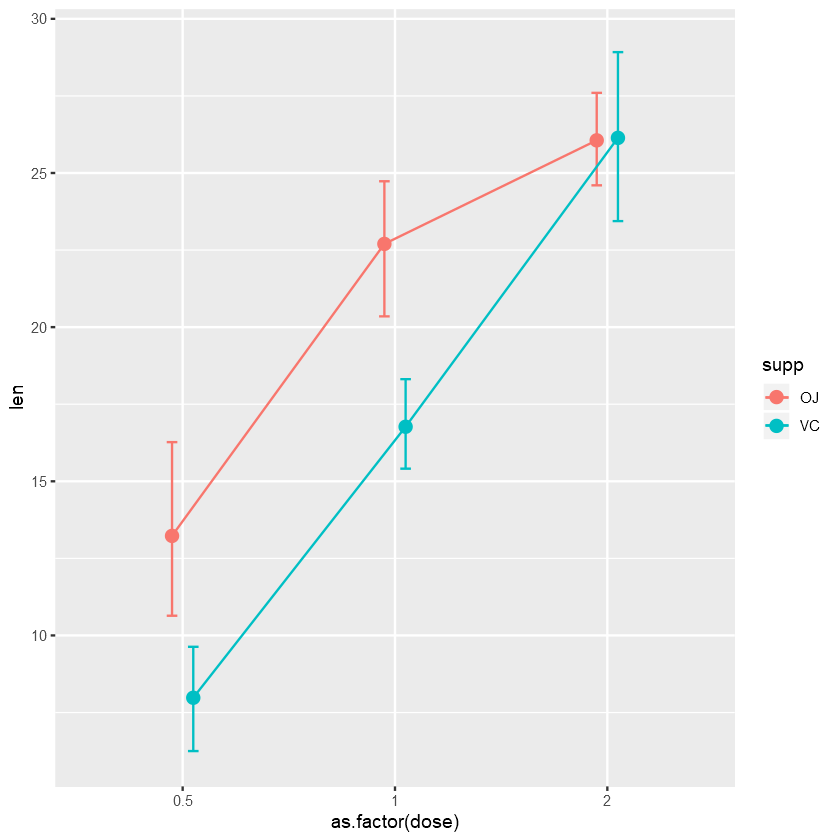

In [127]:
library(ggplot2)
obj <- ggplot(ToothGrowth, aes(x = as.factor(dose), y = len, col = supp,group = supp))+                 #  group = supp
stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.1, position = position_dodge(0.2))+
stat_summary(fun.data = mean_cl_boot, geom = 'point', size = 3, position = position_dodge(0.2))+
stat_summary(fun.data = mean_cl_boot, geom = 'line', position = position_dodge(0.2))
obj

# 2.4 Создание собственных функций

В этом уроке мы научимся создавать собственные функции в R!

Ссылка на скрипт урока.  https://stepik.org/media/attachments/course/129/fun1.R

Ссылка на данные урока.   https://stepik.org/media/attachments/lesson/11507/grants_data.zip

In [129]:
my_vector <- c(1, 2, 3, NA, NA)

In [139]:
which(is.na(my_vector))

[1] 4 5

In [142]:
length(my_vector) - length(which(!is.na(my_vector)))

[1] 2

In [144]:
sum(is.na(my_vector))

[1] 2

Напишите функцию filtered.sum, которая на вход получает вектор с пропущенными, положительными и отрицательными значениями и возвращает сумму положительных элементов вектора.


In [145]:
x <- c(1, -2, 3, NA, NA) # 4

In [209]:
a <- x

In [215]:
x

[1]  160.0  160.0  108.0  258.0  360.0  225.0  360.0  146.7  140.8  167.6
[11]  167.6  275.8  275.8  275.8 1888.0 1840.0 1760.0   78.7   75.7   71.1
[21]  120.1  318.0  304.0  350.0  400.0   79.0  120.3   95.1  351.0  145.0
[31]  301.0  121.0

In [203]:
outliers_rm <- function(x){
outliers <- boxplot(x, plot=FALSE)$out
return( x[-which(x %in% outliers)])
}


In [204]:
outliers_rm(x)

[1] 160.0 160.0 108.0 258.0 360.0 225.0 360.0 146.7 140.8 167.6 167.6 275.8
[13] 275.8 275.8  78.7  75.7  71.1 120.1 318.0 304.0 350.0 400.0  79.0 120.3
[25]  95.1 351.0 145.0 301.0 121.0

In [205]:
IQR(x)

[1] 205.175

In [224]:
quantile(x, probs = c(0.25, 0.75))

25%     75% 
120.825 326.000

In [229]:
 b <- x[ x > quantile(x, probs = c(0.25, 0.75))[2] + 1.5*IQR(x)  | x < 120 - 1.5*IQR(x)]

In [232]:
x[!x %in% b]

[1] 160.0 160.0 108.0 258.0 360.0 225.0 360.0 146.7 140.8 167.6 167.6 275.8
[13] 275.8 275.8  78.7  75.7  71.1 120.1 318.0 304.0 350.0 400.0  79.0 120.3
[25]  95.1 351.0 145.0 301.0 121.0